# Ковальчук Михаил
## ДЗ №3

In [56]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem import Draw
import numpy as np
from IPython.display import display,Image

import rdkit.Chem.Lipinski as Lipinksy
from pubchempy import *

Chem.Draw.DrawingOptions.bondLineWidth=3
Chem.Draw.DrawingOptions.atomLabelFontSize=16

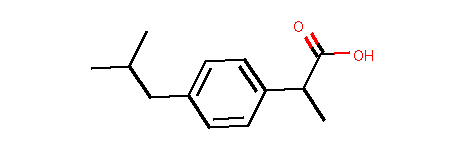

In [57]:
ibu=Chem.MolFromSmiles('CC(C)CC1=CC=C(C=C1)C(C)C(=O)O')
AllChem.Compute2DCoords(ibu)
display(ibu)

In [4]:
print (Lipinksy.NumHDonors(ibu))
print (Lipinksy.NumHAcceptors(ibu))
print (Lipinksy.rdMolDescriptors.CalcExactMolWt(ibu))
print (Lipinksy.rdMolDescriptors.CalcCrippenDescriptors(ibu)[0])

1
1
206.130679816
3.073200000000001


### Модифицированный ибупрофен

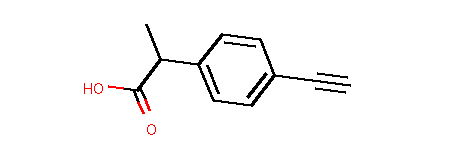

In [97]:
ibu_mod = Chem.MolFromSmiles('C#CC1=CC=C(C=C1)C(C)C(=O)O')
AllChem.Compute2DCoords(ibu_mod)
display(ibu_mod)

### Искал по формуле [N]=[N+]=[N-&!R]

In [40]:
strings = np.genfromtxt('C:/Users/mikhail/Desktop/golovin/1.txt', dtype = np.str)

In [41]:
smiles = []
for line in strings:
        if len(line[1]) < 30 and not '.' in line[1]:
            smiles.append(line[1])

In [42]:
len(smiles)

11248

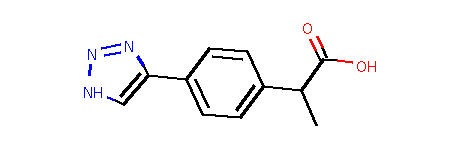

In [86]:
template = Chem.MolFromSmiles('N1C=C(N=N1)C1=CC=C(C=C1)C(C)C(=O)O')
AllChem.Compute2DCoords(template)
display(template)

In [53]:
new_smiles = []
for smi in smiles[:len(smiles)]:
    if 'N=[N+]=[N-]'  in smi:
        new_smiles.append(smi.replace('N=[N+]=[N-]','N1C=C(N=N1)C1=CC=C(C=C1)C(C)C(=O)O'))
    else:
        continue

In [55]:
Lip_rules = []
for smi in new_smiles:
    try:
        mol = Chem.MolFromSmiles(smi)
        if (Lipinksy.NumHDonors(mol) < 5 and
          Lipinksy.rdMolDescriptors.CalcExactMolWt(mol) < 500 and
          Lipinksy.rdMolDescriptors.CalcCrippenDescriptors(mol)[0] < 5 and
          Lipinksy.NumHAcceptors(mol) <= 10):
            Lip_rules.append(smi)
    except:
        pass
len(Lip_rules) 

7563

[B-](N1C=C(N=N1)C1=CC=C(C=C1)C(C)C(=O)O)(F)(F)F


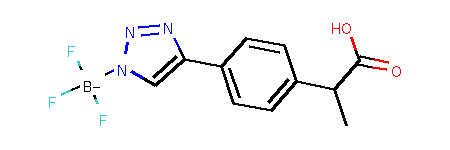

CCOC(CCF)CN1C=C(N=N1)C1=CC=C(C=C1)C(C)C(=O)O


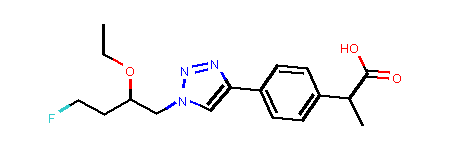

CNN1C=C(N=N1)C1=CC=C(C=C1)C(C)C(=O)O


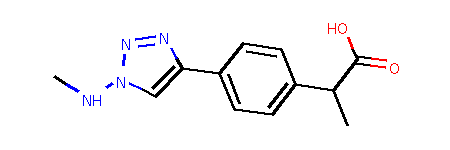

CC1(CCCC=C1)N1C=C(N=N1)C1=CC=C(C=C1)C(C)C(=O)O


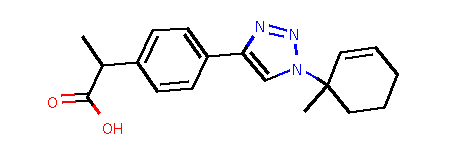

COC1=CC(=C(C=C1)F)N1C=C(N=N1)C1=CC=C(C=C1)C(C)C(=O)O


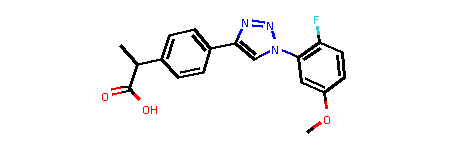

CC1=NN=C(O1)SCCN1C=C(N=N1)C1=CC=C(C=C1)C(C)C(=O)O


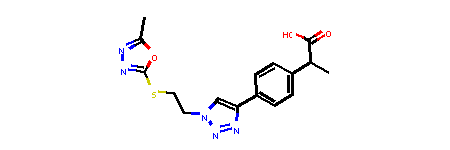

C1=C(ON=C1C(=O)O)CN1C=C(N=N1)C1=CC=C(C=C1)C(C)C(=O)O


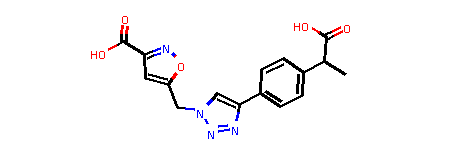

CC(C)N(CCCN1C=C(N=N1)C1=CC=C(C=C1)C(C)C(=O)O)CCOC


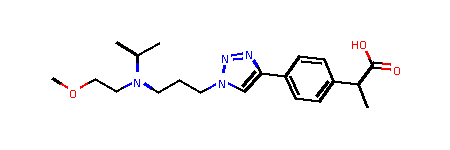

CCCOPN1C=C(N=N1)C1=CC=C(C=C1)C(C)C(=O)O


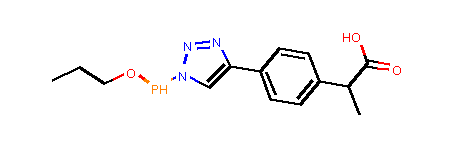

CC(=S)OCCOCCOCCN1C=C(N=N1)C1=CC=C(C=C1)C(C)C(=O)O


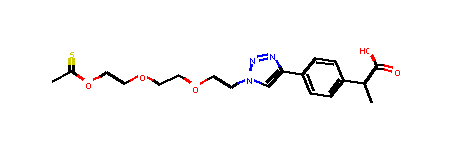

In [88]:
import random

numbers = random.sample(range(len(Lip_rules)), 10)

for i in numbers:
    img=Chem.MolFromSmiles(Lip_rules[i])
    print(Lip_rules[i])
    display(img)

### Попытался навести красоту, но что-то пошло не так

CCNS(=O)(=O)NCCN1C=C(N=N1)C1=CC=C(C=C1)C(C)C(=O)O


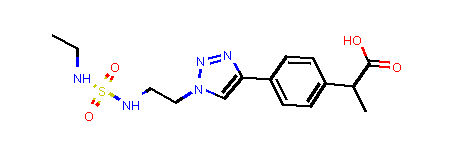

In [93]:
number = random.randint(0, len(Lip_rules))
random_smile = Lip_rules[number]
random_mol = Chem.MolFromSmiles(random_smile)
print(random_smile)
display(random_mol)

In [94]:
m3d=Chem.AddHs(random_mol)
Chem.AllChem.EmbedMolecule(m3d)
AllChem.MMFFOptimizeMolecule(m3d,maxIters=500,nonBondedThresh=200 )

0

In [96]:
import nglview as nv
nv.show_rdkit(m3d)
#shows nothing, wtf